## Importación de los datos

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos = pd.read_excel('data/RED LTE.xlsx')
datos.head()

,Nombre,Frecuencia de radiacion,Modelo del hardware,Altura Antena,Inclinacion Antena,Potencia de radiacion,Ancho de banda,Maximo numero de Usuarios,Codigo de Zona,Multiantena,Velocidad de navegacion promedio[Megabits/s],Disponibilidad de celda [%],Navegacion Exitosa [%]
0,BOG.11 de Noviembre_L1,2600.0,HWXX6516DS,16.0,4,43,15 MHz,640,20026,Closed Loop Mimo,20.252267,1.000000,0.999419
1,BOG.11 de Noviembre_L2,2600.0,HWXX6516DS,16.0,4,43,15 MHz,650,20026,Closed Loop Mimo,16.369700,1.000000,0.999285
2,BOG.11 de Noviembre_L3,2600.0,HWXX6516DS,16.0,4,43,15 MHz,650,20026,Closed Loop Mimo,18.327097,1.000000,0.999205
3,BOG.11 de Noviembre_M1,1900.0,TGA-D3-800TV,18.0,7,43,10 MHz,420,20026,Closed Loop Mimo,6.357766,0.792558,0.998299
4,BOG.11 de Noviembre_M2,1900.0,TGA-D3-800TV,18.0,8,44.8,10 MHz,420,20026,Closed Loop Mimo,9.684789,1.000000,0.998498


## Análisis Preliminar

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71650 entries, 0 to 71649
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Nombre                                        71650 non-null  object 
 1   Frecuencia de radiacion                       71650 non-null  float64
 2   Modelo del hardware                           71650 non-null  object 
 3   Altura Antena                                 71650 non-null  float64
 4   Inclinacion Antena                            71650 non-null  int64  
 5   Potencia de radiacion                         71650 non-null  object 
 6   Ancho de banda                                71650 non-null  object 
 7   Maximo numero de Usuarios                     71650 non-null  object 
 8   Codigo de Zona                                71650 non-null  object 
 9   Multiantena                                   71650 non-null 

Al desplegar la información de la base, observamos que las últimas 3 columnas, correspondientes a los KPI presentan algunos valores nulos. También vemos que hay algunas columnas que tienen un tipo de dato que no corresponde a la naturaleza de columna (Potencia de radicacion y Maximo numero de usuarios), debido principalmente a datos numéricos almacenados como texto.

In [4]:
len(datos['Nombre'].unique())

71559

Vemos también que el número de nombre únicos no es igual al número total de registros, por lo que se concluye que hay registros con nombres duplicados. Esto corresponde a instancias donde la información de la celda se actualizó más de una vez en el mismo día, por lo que pueden aparecer varios registros de la misma celda (nombre). En este caso, se deben eliminar los duplicados y se deja el último registro, que corresponde a la información más actualizada de la celda.

## Preprocesamiento

In [5]:
# Eliminación de datos faltantes

datos_clean = datos.dropna()

In [6]:
# Se eliminan los duplicados de nombre

datos_clean = datos_clean.drop_duplicates(subset='Nombre', keep='last')

In [7]:
# Se cambian los tipos de datos de algunas variables

datos_clean['Frecuencia de radiacion'] = datos_clean['Frecuencia de radiacion'].astype('object')
datos_clean['Potencia de radiacion'] = datos_clean['Potencia de radiacion'].astype('float')
datos_clean['Maximo numero de Usuarios'] = datos_clean['Maximo numero de Usuarios'].astype('int')

In [8]:
# Se define el nombre como el índice

datos_clean = datos_clean.set_index('Nombre', drop = True)

## Análisis Exploratorio

In [16]:
# Se imprimen estadísticas descriptivas de los datos numéricos

datos_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Altura Antena,70371.0,31.255382,14.481396,0.0,21.000000,30.000000,40.000000,100.000000
Inclinacion Antena,70371.0,5.720553,2.539420,0.0,4.000000,6.000000,7.000000,19.000000
Potencia de radiacion,70371.0,43.540939,1.764079,18.0,43.000000,43.000000,44.800000,49.000000
Maximo numero de Usuarios,70371.0,905.341092,318.745182,230.0,650.000000,960.000000,1200.000000,1470.000000
Velocidad de navegacion promedio[Megabits/s],70371.0,16.643743,6.366564,0.0,11.784151,16.249735,20.847237,55.561665
Disponibilidad de celda [%],70371.0,0.978548,0.096953,0.0,0.999139,1.000000,1.000000,1.000000
Navegacion Exitosa [%],70371.0,0.993174,0.062757,0.0,0.996829,0.998575,0.999220,1.000000


In [15]:
# Se imprimen estadísticas descriptivas de los datos categóricos

datos_clean.describe(include='object').T

,count,unique,top,freq
Frecuencia de radiacion,70371,5,1900,20741
Modelo del hardware,70371,167,ASI4517R3v18,10357
Ancho de banda,70371,4,15 MHz,40520
Codigo de Zona,70371,252,27012,1668
Multiantena,70371,6,Closed Loop MIMO (4x4),34170


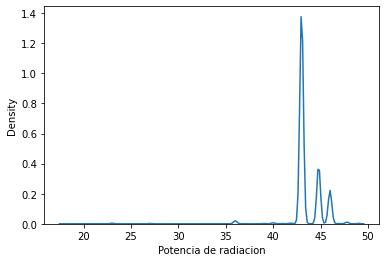

In [21]:
sns.kdeplot(datos_clean['Potencia de radiacion'])
plt.show()

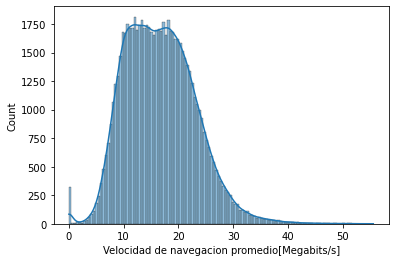

In [24]:
sns.histplot(datos_clean['Velocidad de navegacion promedio[Megabits/s]'], kde = True)
plt.show()

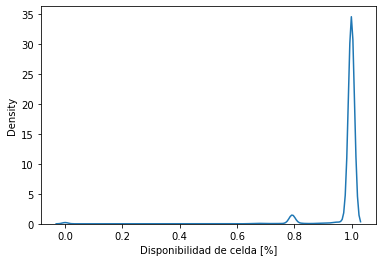

In [27]:
sns.kdeplot(datos_clean['Disponibilidad de celda [%]'])
plt.show()

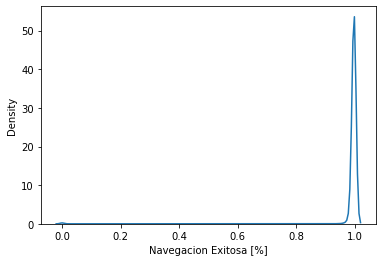

In [28]:
sns.kdeplot(datos_clean['Navegacion Exitosa [%]'])
plt.show()